<a href="https://colab.research.google.com/github/ProfAI/machine-learning-fondamenti/blob/main/6%20-%20Clustering/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L'algoritmo K-means

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme()

In [3]:
RANDOM_SEED = 2

### Generiamo i dati

<Axes: >

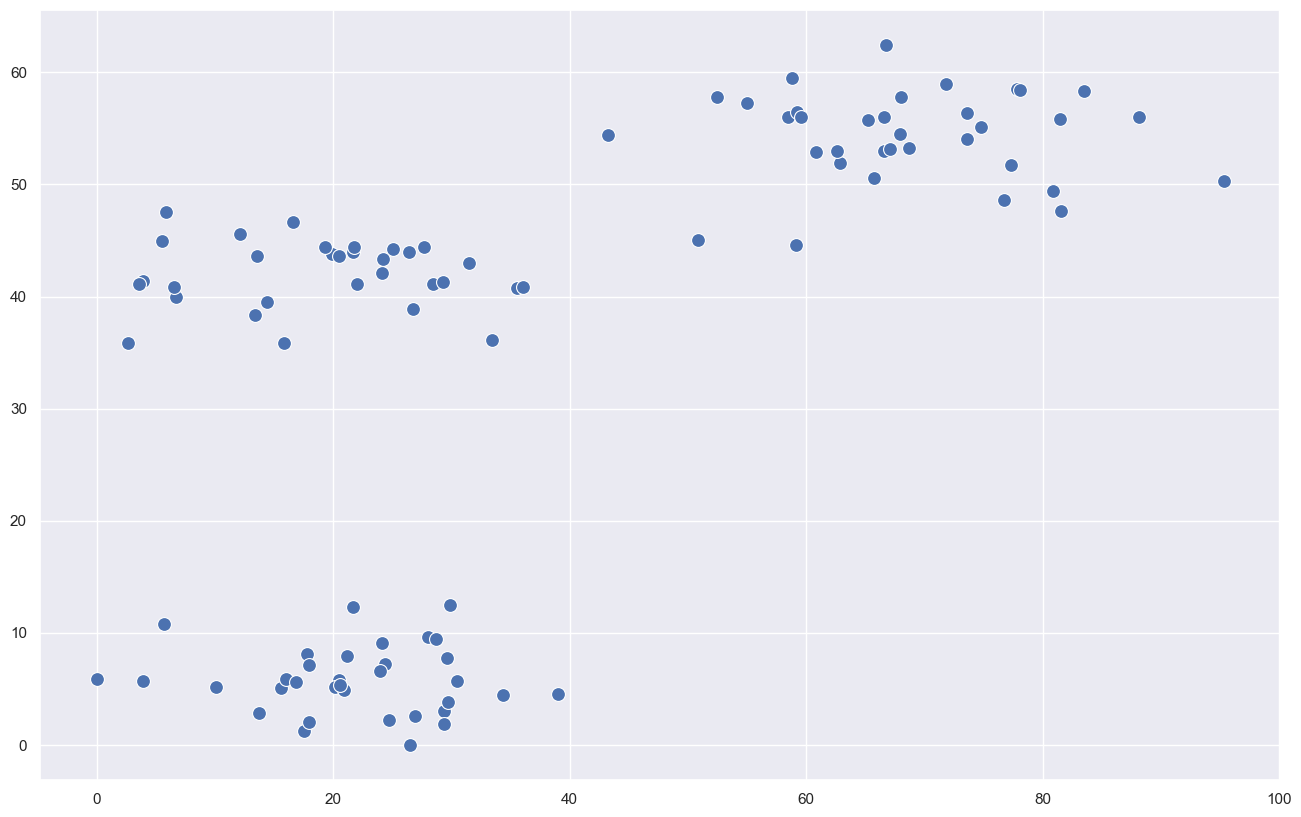

In [4]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5, random_state=RANDOM_SEED)
# usiamo '_' perchè per il clustering il target non ci interessa

X[:,0] = (X[:,0]-X[:,0].min())*20
X[:,1] = (X[:,1]-X[:,1].min())*6 

sns.scatterplot(x=X[:,0], y=X[:,1], s=100)

### Creiamo il modello

In [5]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq
from time import time

In [6]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_SEED)

tick = time()
kmeans.fit(X)
print(f"Modello addestrato in {time()-tick:.5f} secondi" )

/Users/andrea/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Modello addestrato in 0.26512 secondi


In [7]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_SEED, init="k-means++")

#kmeans++ è un algoritmo di inizzializzazione dei centroidi che ottimizza la loro distanza

tick = time()
kmeans.fit(X)
print(f"Modello addestrato in {time()-tick:.5f} secondi" )

Modello addestrato in 0.10085 secondi


/Users/andrea/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Valutiamo il modello

In [14]:
from scipy.spatial.distance import cdist

# cdist ci permette di calcolare la distanza tra ogni coordinata e ogni osservazione 
# presente nel dataset

#esempio
a = np.array([[1,2],[3,2]])
b = np.array([[2,1],[3,3]])
cdist(a,b,"euclidean")

array([[1.41421356, 2.23606798],
       [1.41421356, 1.        ]])

In [9]:
distorsion = sum(np.square(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))) / X.shape[0]
distorsion

107.41040694974288

In [10]:
inertia = sum(np.square(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)))
inertia

10741.040694974288

In [11]:
#oppure
kmeans.inertia_

10741.040694974286

### Visualizziamo i cluster

In [12]:
y_kmeans = kmeans.predict(X)

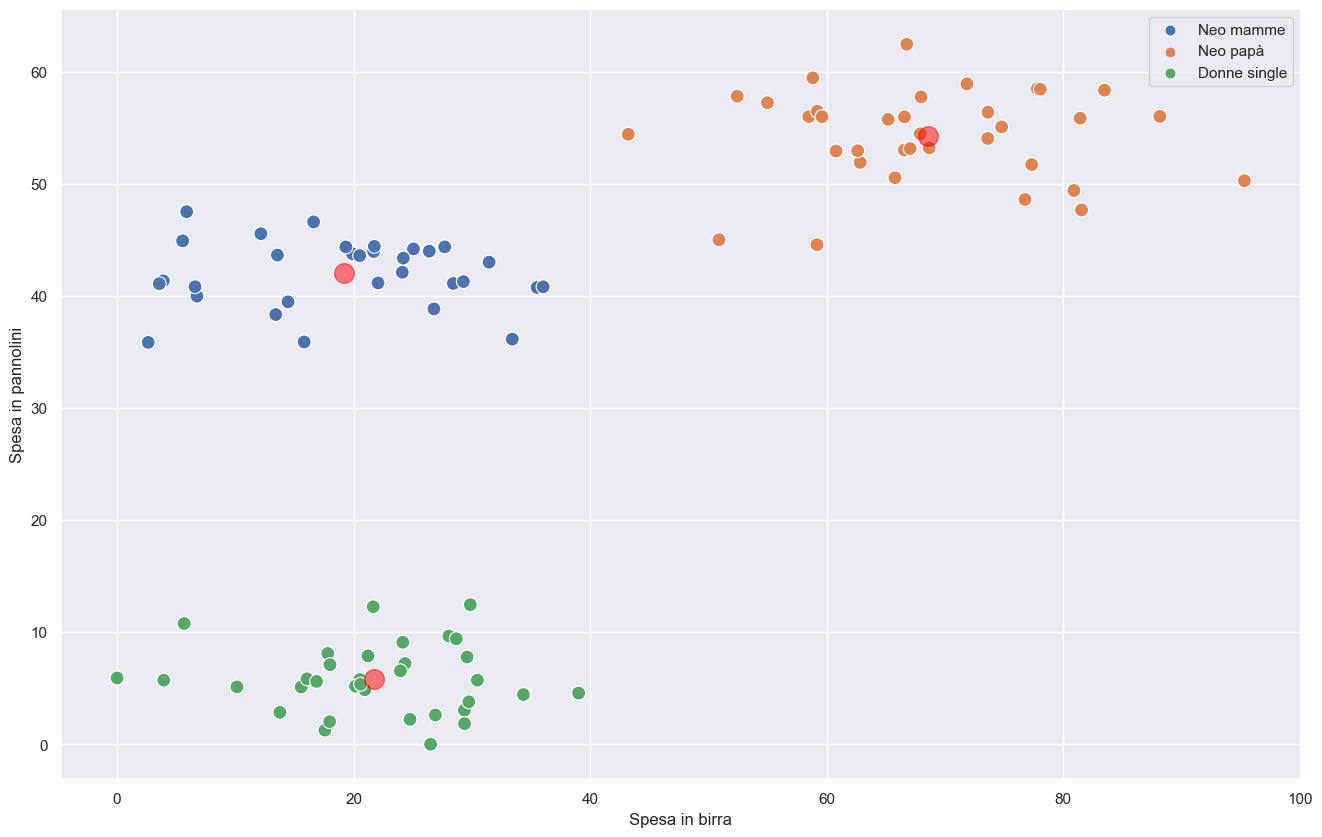

In [13]:
#per dare un significato ai dati
L = {0:"Donne single",1:"Neo papà",2:"Neo mamme"}
vfunc = np.vectorize(lambda x: L[x]) #ci permette di sostituire il valore numerico con la string in L

labels = vfunc(y_kmeans)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, s=100)
plt.xlabel("Spesa in birra")
plt.ylabel("Spesa in pannolini")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);